# Pula Junior Data Analyst Test

## Loading data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Junior_Data_Analyst_Data.xlsx", header=2)

In [3]:
df[:10]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000
6,6,2020-01-01 06:00:00,0.006,0.648000
7,7,2020-01-01 07:00:00,0.009,0.774000
8,8,2020-01-01 08:00:00,0.012,1.299000
9,9,2020-01-01 09:00:00,0.846,0.606000


> The dataframe contains four columns
> 
> Data types for the dates are in the datetime format

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


> The highest value for Electricity usage is disproportionately higher than the mean [46000.000000] . Could be an outlier.

In [5]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [6]:
df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

## Visualize the distribution of 'Solar electricity generation (kWh)', and 'Electricity usage (kWh)' series

In [7]:
import seaborn as sns
import matplotlib as mpl
sns.set_theme(style="darkgrid")


C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


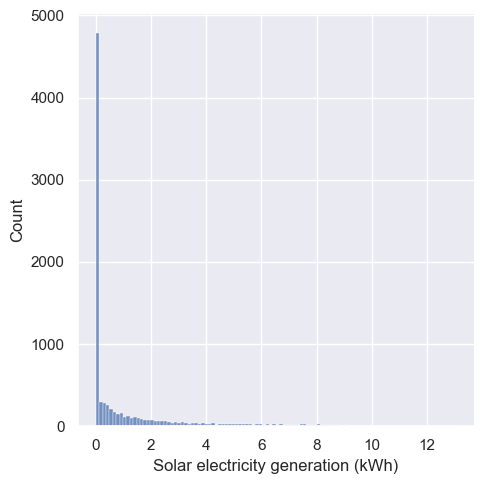

In [8]:
sns.displot(data=df, x="Solar electricity generation (kWh)")

> Most of the samples from the 'Solar electricity generation (kWh)' series are between 0 to 4 kWh

> The distribution visualization for  'Electricity usage (kWh) series' is not sensible. An outlier could be affecting the visualization

<Axes: xlabel='Electricity usage (kWh)', ylabel='Proportion'>

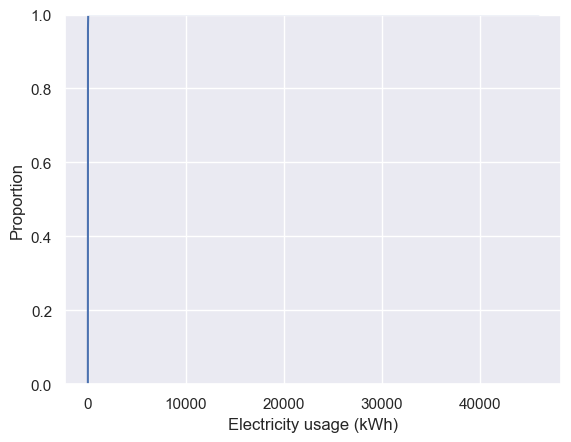

In [9]:
sns.ecdfplot(data=df, x="Electricity usage (kWh)")

## Removing the outlier value from the 99.99 percentile which is one value. 

> The number obtained after iterating over the most appropriate distribution segment to slice.

In [10]:
q = df["Electricity usage (kWh)"].quantile(0.9999)

In [11]:
df_copy = df.copy()

In [12]:
df_clean = df_copy[df_copy["Electricity usage (kWh)"] < q]
df_outlier = df_copy[df_copy["Electricity usage (kWh)"] > q]

In [13]:
df_clean.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8759.000000,8759,8759.000000,8759.000000
mean,11.499943,2020-07-02 08:05:28.804657920,1.116282,2.061798
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.500000,2020-04-02 06:30:00,0.000000,0.300000
50%,11.000000,2020-07-02 12:00:00,0.024000,0.621000
75%,17.500000,2020-10-01 17:30:00,1.272000,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,61.102800
std,6.922975,NaN,2.025741,4.641550


C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


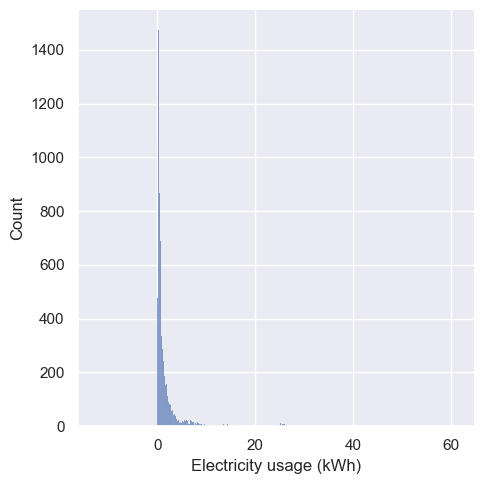

In [14]:
sns.displot(data=df_clean, x="Electricity usage (kWh)")

## Visualize the samples to understand the trend, cycles and patterns in the time series

> The cycles are visualized by picking the first 
> 60 hours
> 1st week
> 1st month
> Yearly

### Solar Electricity Generation

#### First 60 Hours

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


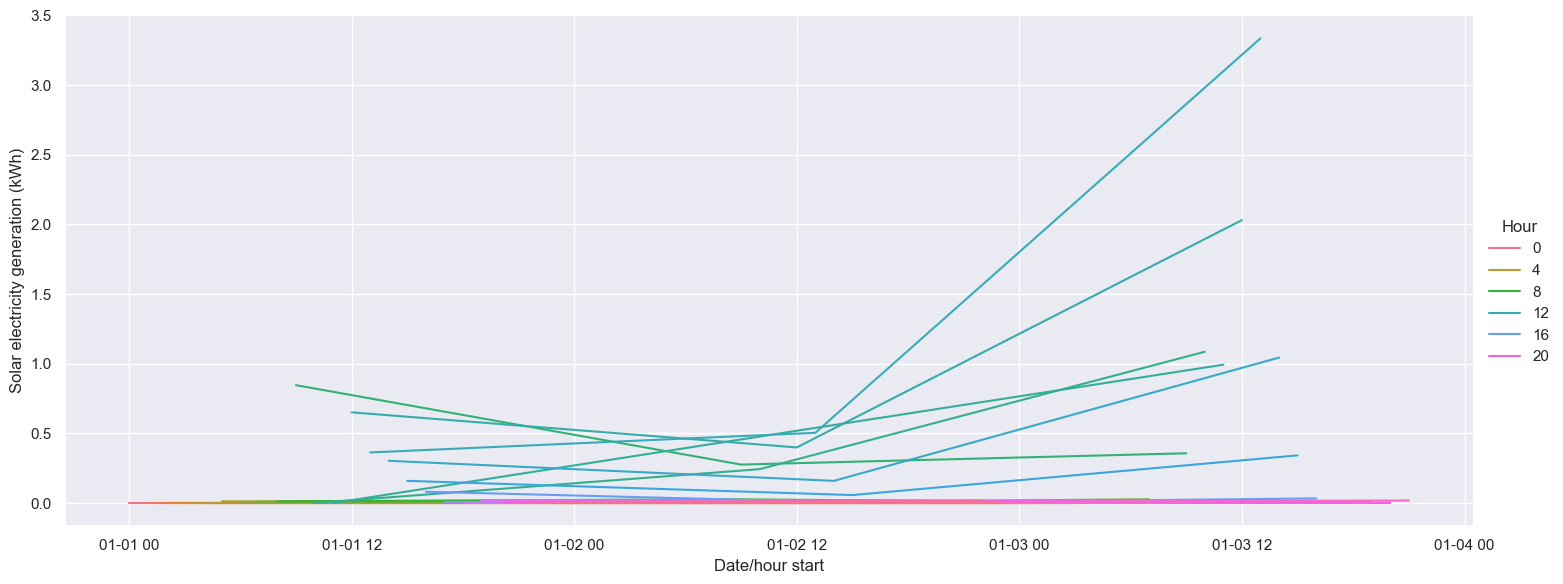

In [15]:
sns.relplot(x="Date/hour start", y="Solar electricity generation (kWh)",
             hue="Hour",
             data=df[:70], kind="line", height=6, aspect=2.5, palette="husl",)

> The peak generation hours of electricity occurs between the 8th and 16th hour

#### Weekly

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


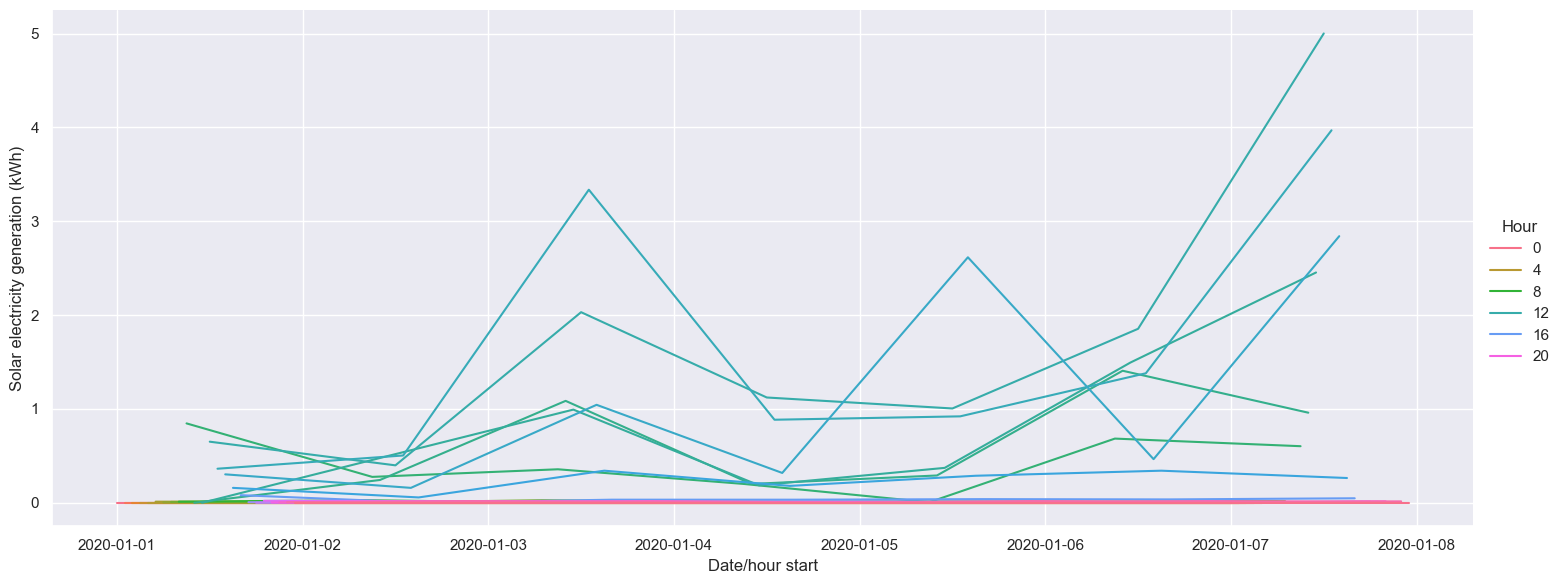

In [16]:
sns.relplot(x="Date/hour start", y="Solar electricity generation (kWh)",
             hue="Hour",
             data=df[:24*7], kind="line", height=6, aspect=2.5, palette="husl",)

> The weekly visualization indicates weekly peeks during the weekend
>
> Peak generation occurs between the 12th and 16th hour

#### Monthly

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


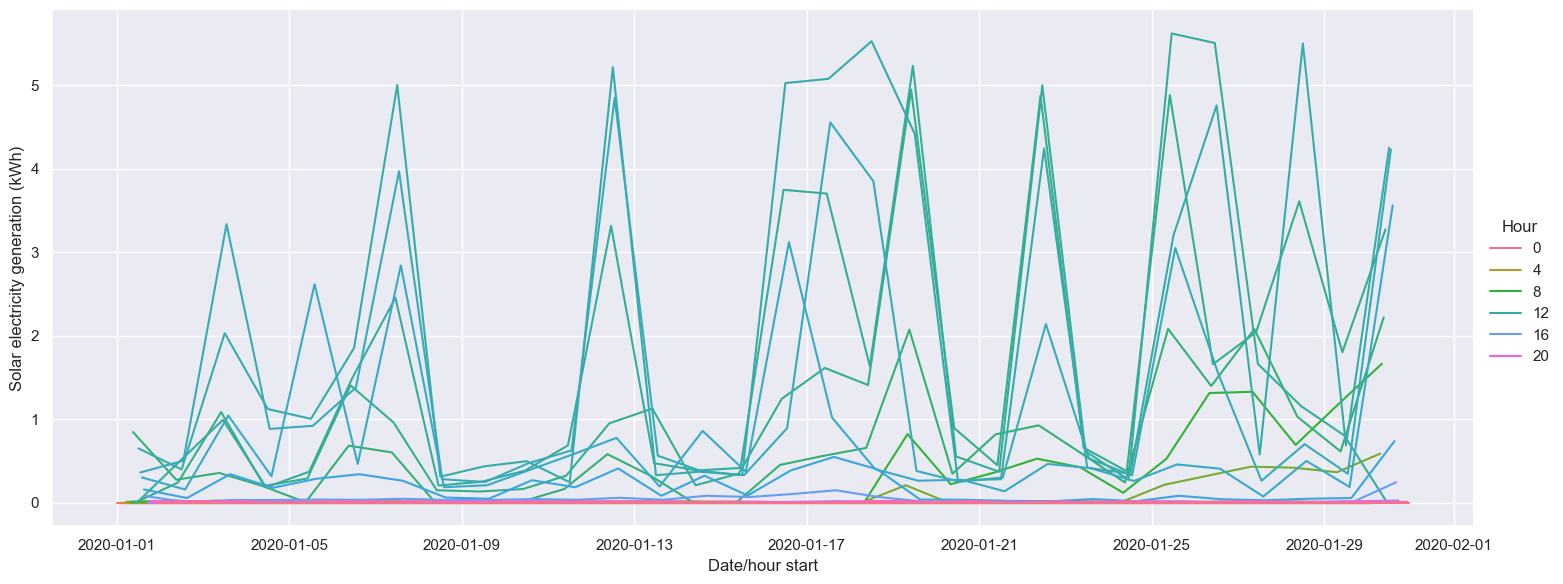

In [17]:
sns.relplot(x="Date/hour start", y="Solar electricity generation (kWh)",
             hue="Hour",
             data=df[:24*30], kind="line", height=6, aspect=2.5, palette="husl",)

> There are cyclic spikes in the generated electricity in the first month with almost identical peaks of 5 kWh

#### Yearly

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


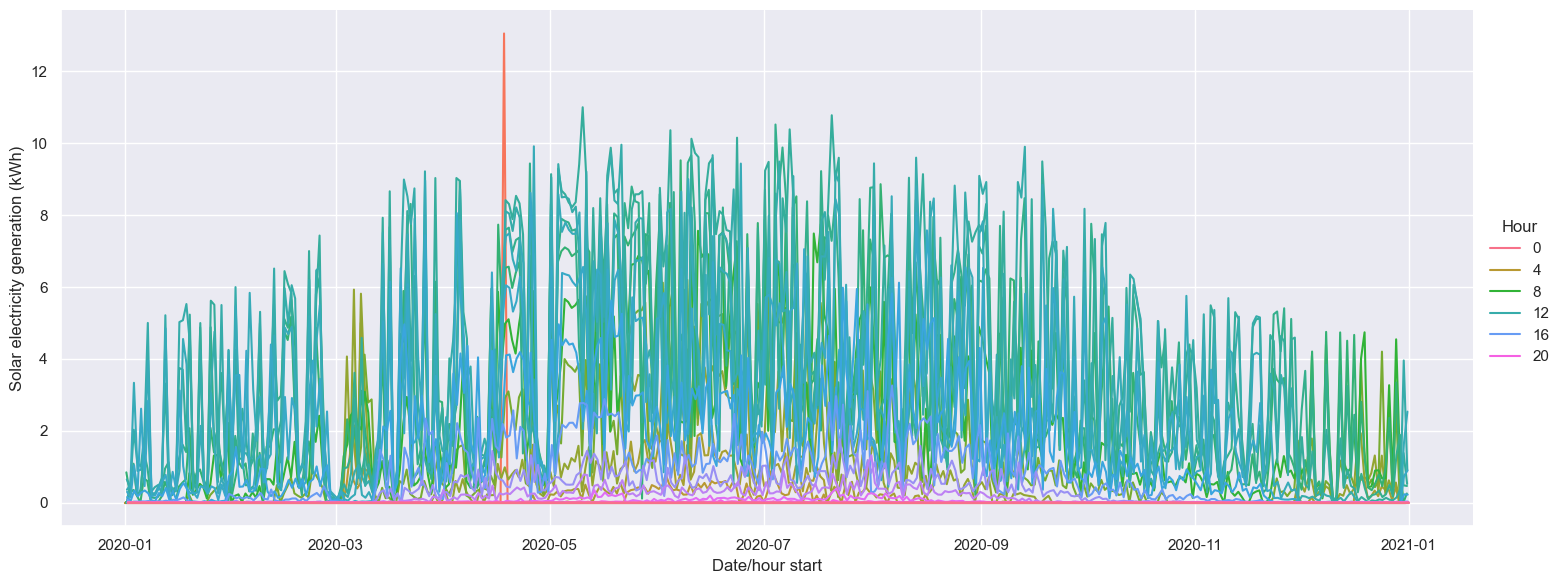

In [18]:
sns.relplot(x="Date/hour start", y="Solar electricity generation (kWh)",
             hue="Hour",
             data=df, kind="line", height=6, aspect=2.5, palette="husl",)

> The solar power generation peaks mid-year between May, June, July and August with peaks of 10 kWh of generated electricity.
>
> There is an outlier data point of 13 kWh.
>
> There is a seasonality in power generation that occurs yearly that peaks mid-year and slumps at the end and beginning of the year.

### Electricity Usage

#### First 60 Hours

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


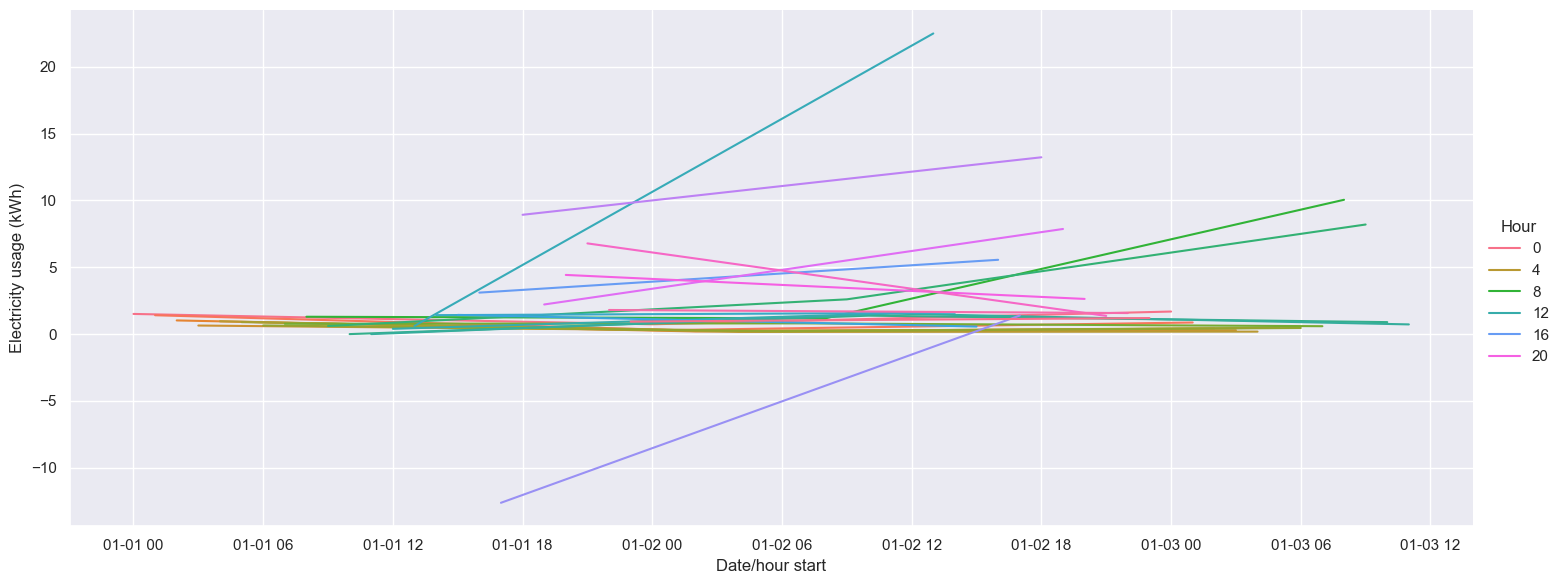

In [19]:
sns.relplot(x="Date/hour start", y="Electricity usage (kWh)",
             hue="Hour",
             data=df_clean[:60], kind="line", height=6, aspect=2.5, palette="husl")

> Electricity usage peaks in 12th hour during the first 60 hours
>
> There is a negative electricity usage in the 16th hour. Could indicate supply to the grid.

#### Weekly

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


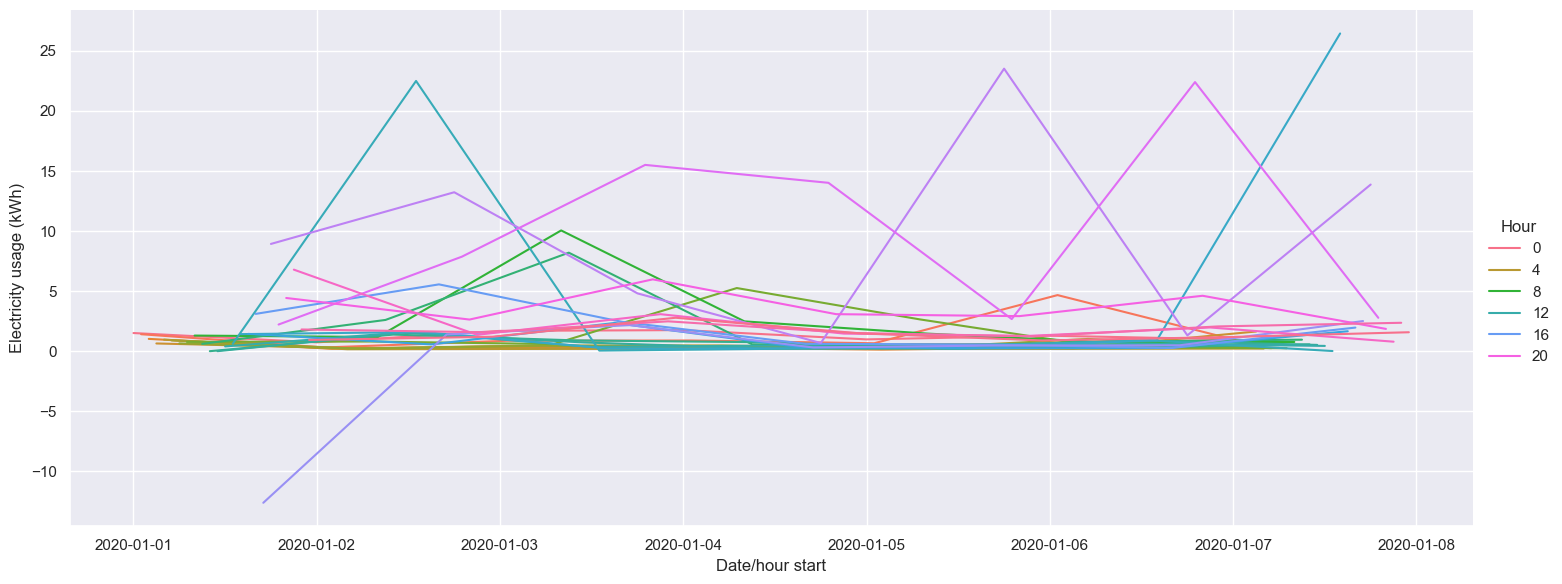

In [20]:
sns.relplot(x="Date/hour start", y="Electricity usage (kWh)",
             hue="Hour",
             data=df_clean[:24*7], kind="line", height=6, aspect=2.5, palette="husl")

> There are peaks in electricity usage at different times.
>
> Most electricity usage occurs occurs within the range of 0 to 2.5 kWh during the first week.

#### Monthly

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


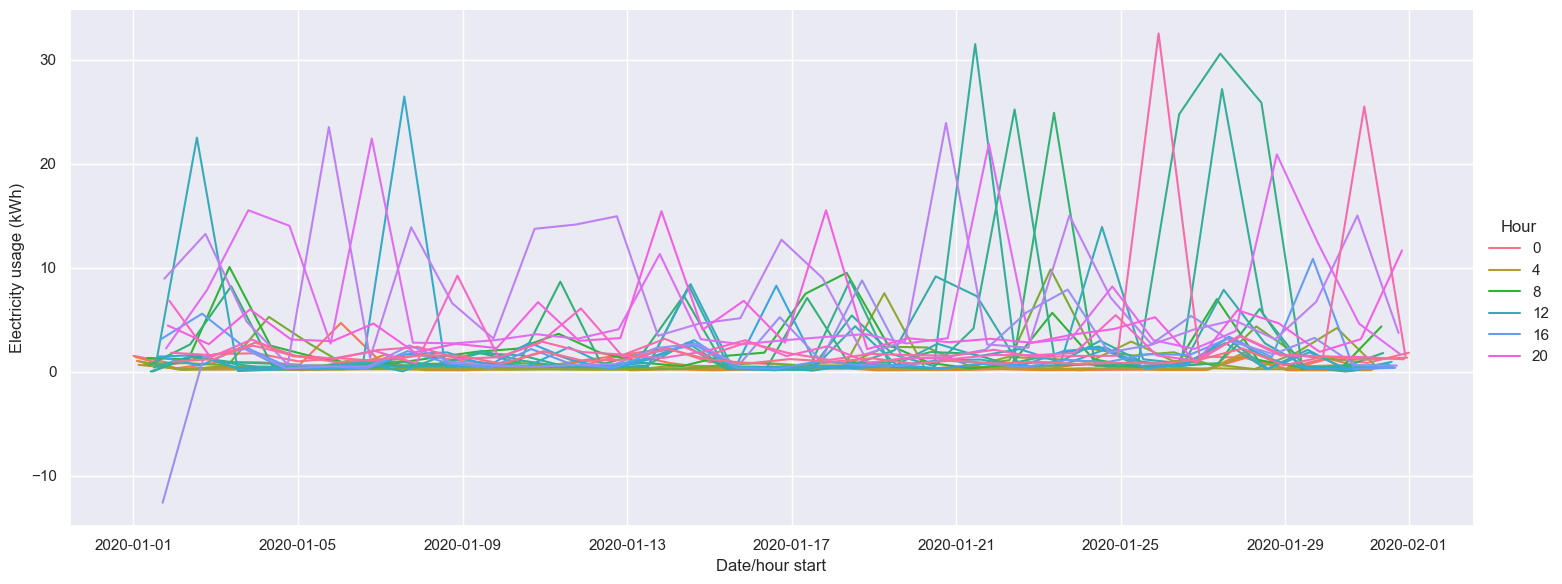

In [21]:
sns.relplot(x="Date/hour start", y="Electricity usage (kWh)",
             hue="Hour",
             data=df_clean[:24*31], kind="line", height=6, aspect=2.5, palette="husl")

> There are three peaks above 30 kWh usage of electricity in the first month
>
> Most of the usage occurs within the range of 0 to 5 kWh during the first month

#### Yearly

C:\Users\Al\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


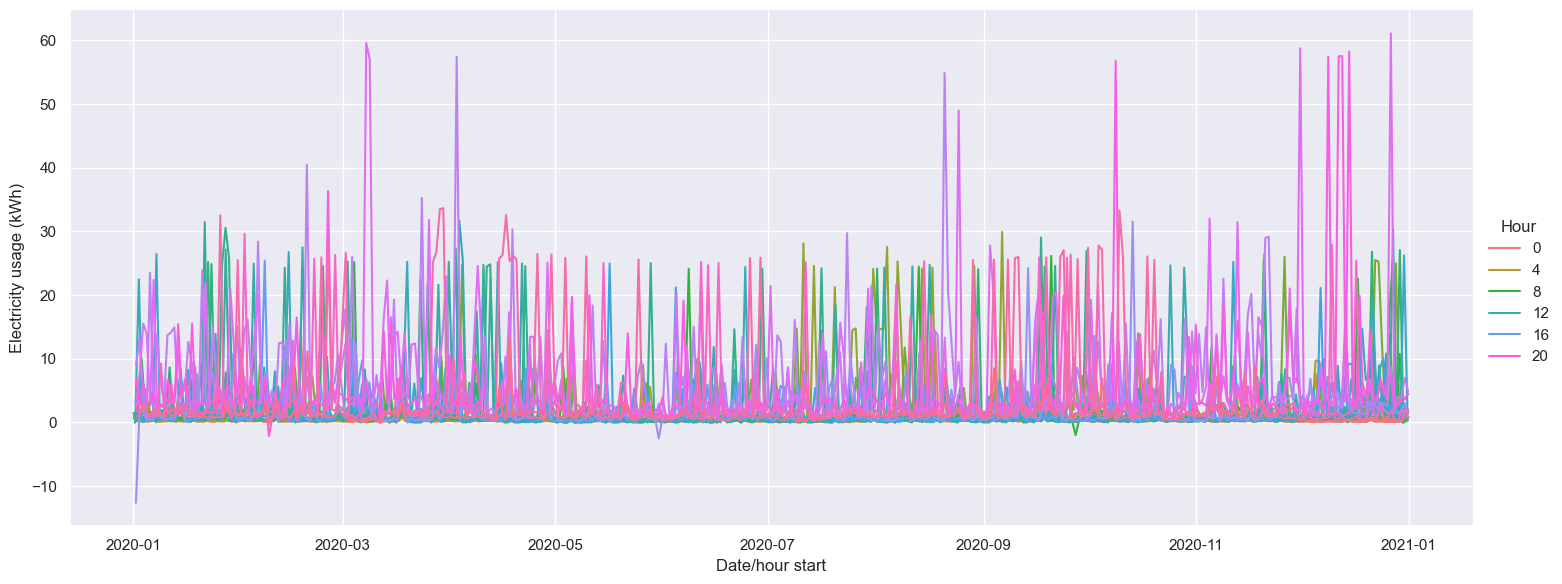

In [22]:

sns.relplot(x="Date/hour start", y="Electricity usage (kWh)",
             hue="Hour",
             data=df_clean, kind="line", height=6, aspect=2.5, palette="husl")


> Electricity usage is consistent throughout the year with peaks occuring randomly through the year
>
> There are 9 instances of peak usage of electricicy occuring between the 20th hour and midnight.
>
> The visualization does not account for the removed outlier value with a peak usage of 46000 kWh

In [23]:
df_outlier

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
276,12,2020-01-12 12:00:00,5.214,46000.0


> The outlier occured in the 12th hour during the first month with electricity generation of 5 kWh